In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import scipy.optimize as sco
import scipy.constants as c
from scipy.optimize import curve_fit as curce_fit
import pandas as pd

def degtorad(deg):
    return(deg/180*np.pi)


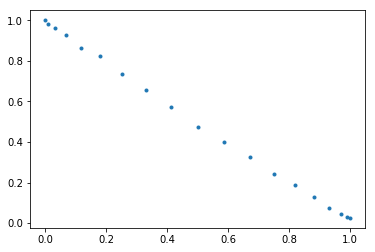

In [2]:
#Als erstes mal die Linearität der Fotodiode Prüfen
data=pd.read_table("Data/Polarisation.txt",skiprows=2)
data

angle=np.array(data.values[:,0])
intens=np.array(data.values[:,1])
intens=intens/np.max(intens)
fig,ax=plt.subplots()
ax.plot(np.sin(degtorad(angle))**2,intens,".")

In [3]:
def dirac(wavelen,T,E_F):
    E=c.h * c.c / wavelen /c.e
    return 500/ ( np.exp((E-E_F)/8.6e-5 /T) -1 ) # k_B in eV
def diracE(E,T,E_F):
    return 1/ ( np.exp((E-E_F)/c.k/T) -1 ) 

def heavi(x,A,b,c):
    return A * (np.sign(x-b) + c) # A=amp/2 , b=Eg in nm

def expon(x,A,E_g):
    E=c.h * c.c / x /c.e
    return A * np.exp(E/E_g)
def linearfit(linf,x,y,m,b,ymin,ymax):
    """Returns popt,pcov,relevantx,relevanty"""
    tempx=[]
    tempy=[]
    #hier werden die Daten ausgewählt die im richtigen y interval sind
    for i in range(len(y)):
        if(ymin<y[i] and y[i]<ymax):
            tempx.append(x[i])
            tempy.append(y[i])
    popt,pcov=curce_fit(linf,tempx,tempy,p0=(m,b),maxfev=10000)
    return popt,pcov,tempx,tempy
def adjustLambda(lamb,m=0.98,b=23.25):
    return(b+lamb*m)
def wavelen_in_Energy(wavelen):
    wavelen=np.array(wavelen)
    wavelen=wavelen*1e-9
    E=c.h*c.speed_of_light/(wavelen*c.e)
    return(E)

C:\Users\Gunther\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


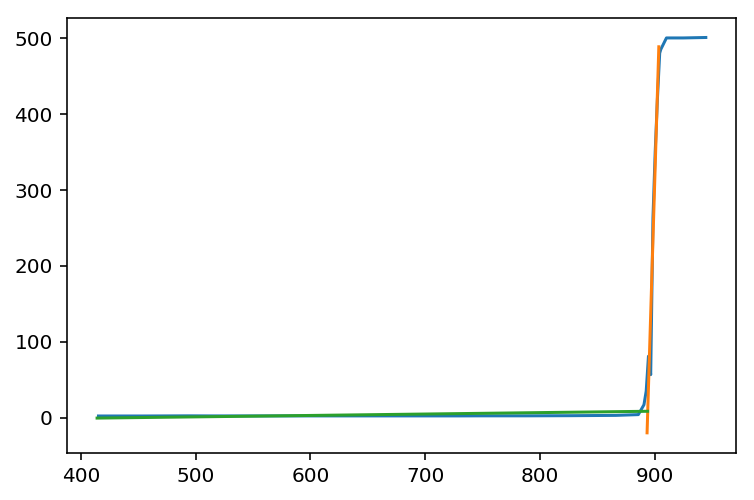

In [4]:

data=[]
data.append( pd.read_csv("Data/{}.txt".format("Links"),delimiter="\t",skiprows=1 ))
wavelen, intens =[],[]
for entry in data:
    wavelen= entry.values[:,0]
    intens = entry.values[:,1]
    

wavelen=np.array(wavelen)

#Als erstes nur die interessanten werte betrachten, also ab 950nm cutten
relwavelen=[]
for x in wavelen:
    if(x<950):
        relwavelen.append(x)
relintens=intens[0:len(relwavelen)]
relwavelen=adjustLambda(np.array(relwavelen))
fig, ax = plt.subplots(dpi=144)

#Data plot
ax.plot(relwavelen,relintens)

#Fit Steigung
linf=lambda x,m,b:m*x+b
popt,pcov,tempx,tempy=linearfit(linf,relwavelen,relintens,10,40,40,450)
extension=1.2
mylin=np.linspace(min(tempx)-extension,max(tempx)+extension)
ax.plot(mylin, linf(mylin,*popt))

#Fit Gerade
#Fit
linf=lambda x,m,b:m*x+b
popt,pcov,tempx,tempy=linearfit(linf,relwavelen,relintens,10,40,0,40)
extension=1.2
mylin=np.linspace(min(tempx)-extension,max(tempx)+extension)
ax.plot(mylin, linf(mylin,*popt))
ax.legend();


In [5]:
def plotXY(ax,filename,skiprows,label):
    data=pd.read_table(filename,skiprows=skiprows)
    angle=np.array(data.values[:,0])
    intens=np.array(data.values[:,1])
 
    ax.plot(angle,intens,label=label)

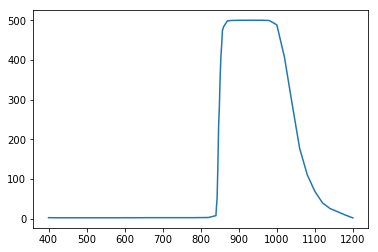

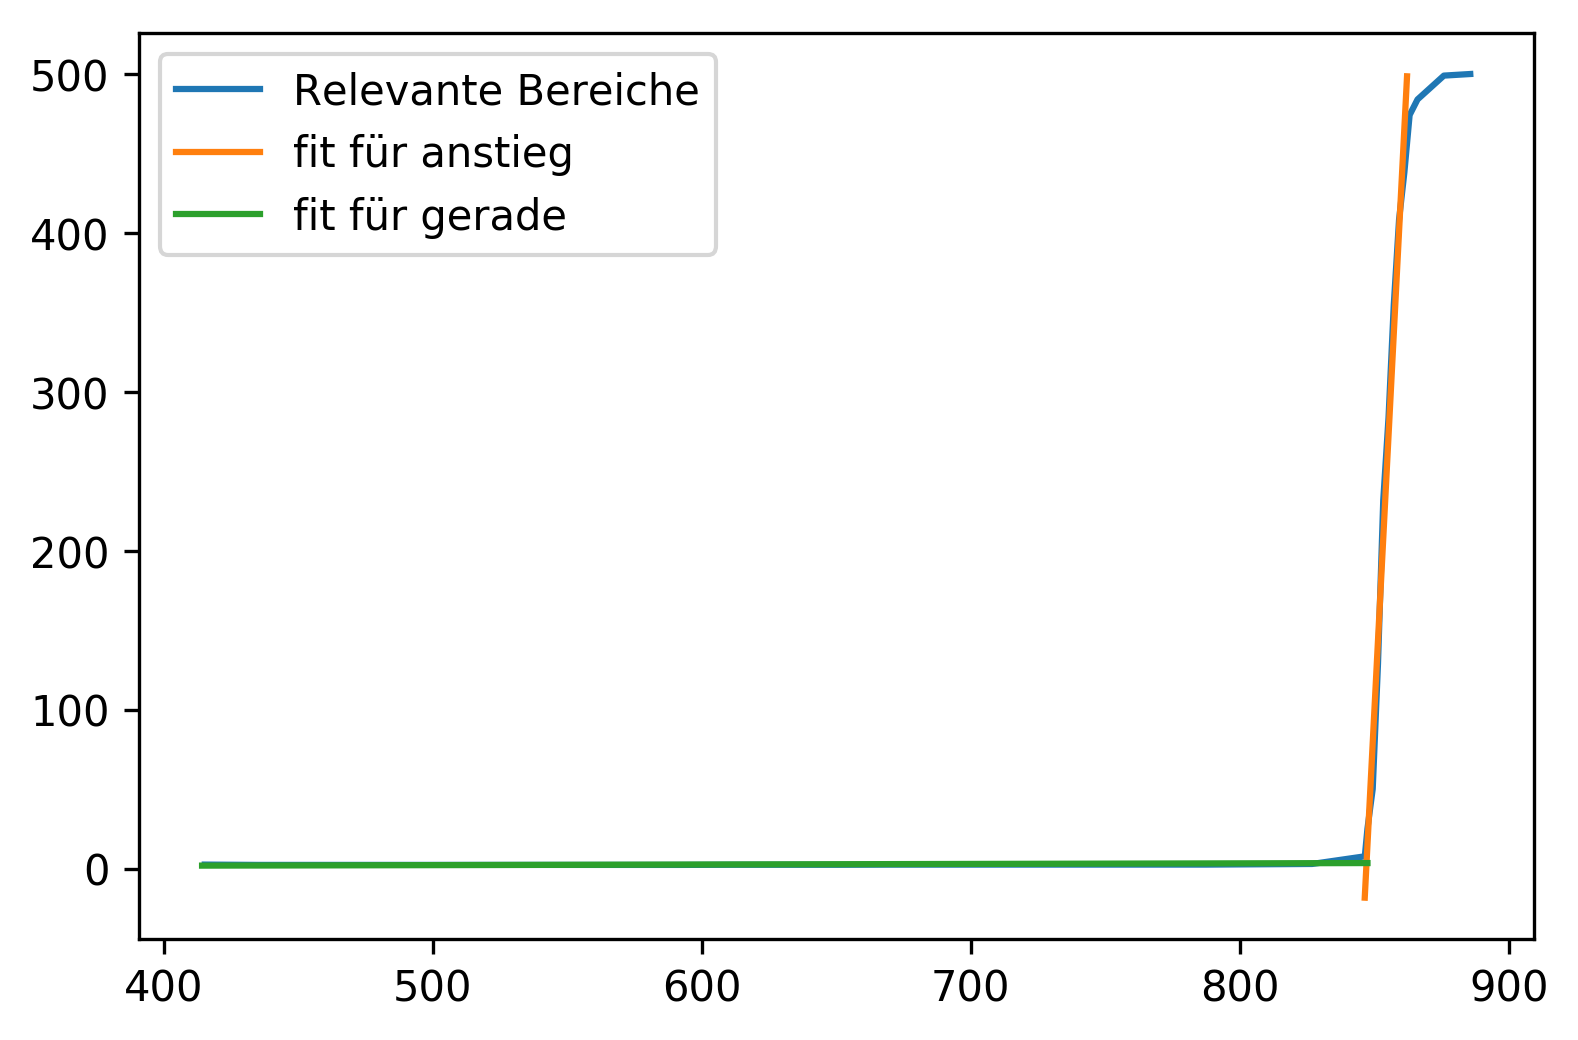

In [6]:
fig,ax=plt.subplots()
plotXY(ax,"Data/LinksN2.txt",2,"Gesamte Links N2")
data=pd.read_table("Data/LinksN2.txt",skiprows=2)
angle=np.array(data.values[:,0])
intens=np.array(data.values[:,1])
#Den hinteren teil abschneiden
fig,ax=plt.subplots(dpi=300)
relangle=[]
for x in angle:
    if(x<900):
        relangle.append(x)
relangle=adjustLambda(np.array(relangle))
relintens=intens[:len(relangle)]
ax.plot(relangle,relintens,label="Relevante Bereiche")
#Fit des Anstiegs
func=lambda x,m,b:m*x+b
popt,pcov,xplot,yplot=linearfit(func,relangle,relintens,10,800,20,450)
mylin=np.linspace(min(xplot)-1,max(xplot)+1,1000)
ax.plot(mylin,func(mylin,*popt),label="fit für anstieg")
#Fit der geraden bis 800nm
popt,pcov,xplot,yplot=linearfit(func,relangle,relintens,0,0,0,20)
mylin=np.linspace(min(xplot)-1,max(xplot)+1,1000)
ax.plot(mylin,func(mylin,*popt),label="fit für gerade")
ax.legend()

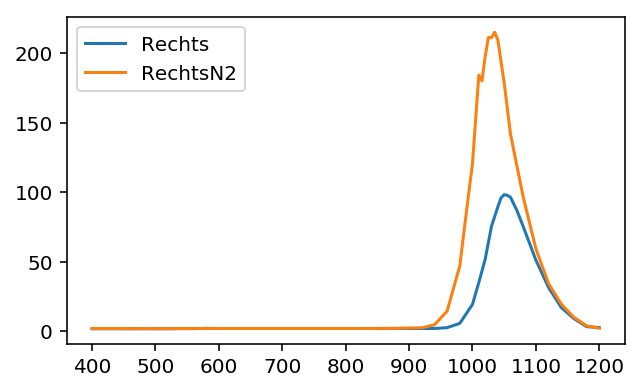

In [7]:
fig,ax=plt.subplots(dpi=144,figsize=(5,3))
plotXY(ax,"Data/Rechts.txt",2,"Rechts")
plotXY(ax,"Data/RechtsN2.txt",2,"RechtsN2")
#plotXY(ax,"Data/Links.txt",2,"Links")
#plotXY(ax,"Data/LinksN2.txt",2,"LinksN2")
#ax.semilogy()
ax.legend()

In [8]:
def indFit(wl,Eg,Ep,A,T=300):
    wl=wl*1e-9
    h_nu= c.h*c.c /wl /c.e
    return A *((h_nu - Eg + Ep)**2/ ( np.exp(Ep/c.Boltzmann/c.e / T) -1) + (h_nu - Eg - Ep)**2/ ( 1- np.exp(-Ep/c.Boltzmann/c.e / T) ))

C:\Users\Gunther\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


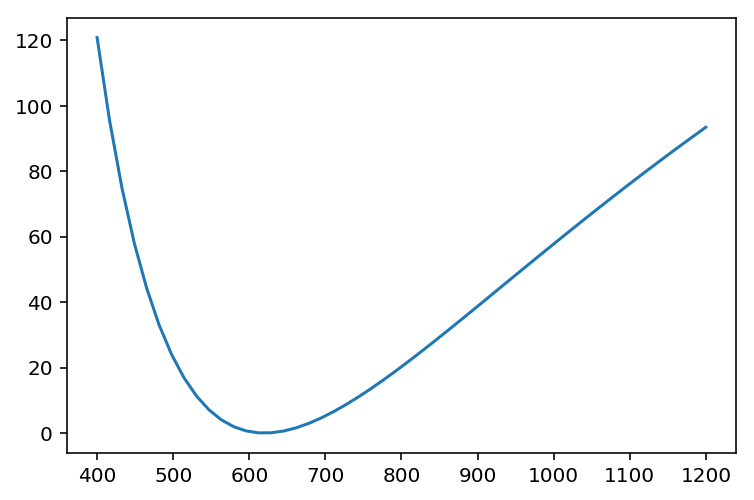

In [9]:
#popt,pcov=cf(ind Fit)

d=np.linspace(400,1200)
fig,ax=plt.subplots(dpi=144)
ax.plot(d,100* indFit(d, 1.7, 0.3,1))
#ax.set(yscale="log")

C:\Users\Gunther\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


1 : [  5.55922654e-13   5.56214265e-13  -7.00314514e-07]
2 : [  4.27890462e-09   3.92149718e-09  -7.00314512e-07]
3 : [  2.60277026e-10   6.27612367e-10  -7.00314513e-07]
4 : [  1.67333965e-09   4.03724816e-09  -7.00314512e-07]
5 : [  9.72604803e-12   1.43077249e-11  -7.00314514e-07]
6 : [  1.31927047e-12   1.94095877e-12  -7.00314514e-07]
7 : [  2.67872499e-10   3.27801735e-10  -7.00314513e-07]
8 : [  1.37590301e-09   2.02434833e-09  -7.00314512e-07]
9 : [  3.93610145e-13   6.40950981e-13  -7.00314514e-07]
10 : [  1.04785839e-09   1.70620845e-09  -7.00314510e-07]
11 : [  1.06352673e+03   1.89337626e-01  -3.96172644e-04]
12 : [  3.92160344e-09   4.27908998e-09  -7.00314512e-07]
13 : [  2.38585738e-12   3.17898136e-12  -7.00314514e-07]
14 : [  1.20578713e-09   1.67214527e-09  -7.00314513e-07]
15 : [  5.16408799e-10   4.72928082e-10  -7.00314513e-07]
16 : [  1.50900119e-11   1.97329417e-11  -7.00314514e-07]
17 : [  1.06122190e+03   2.58089254e+00  -3.95350817e-04]
18 : [  1.46696662e-10 

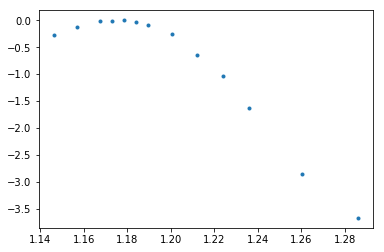

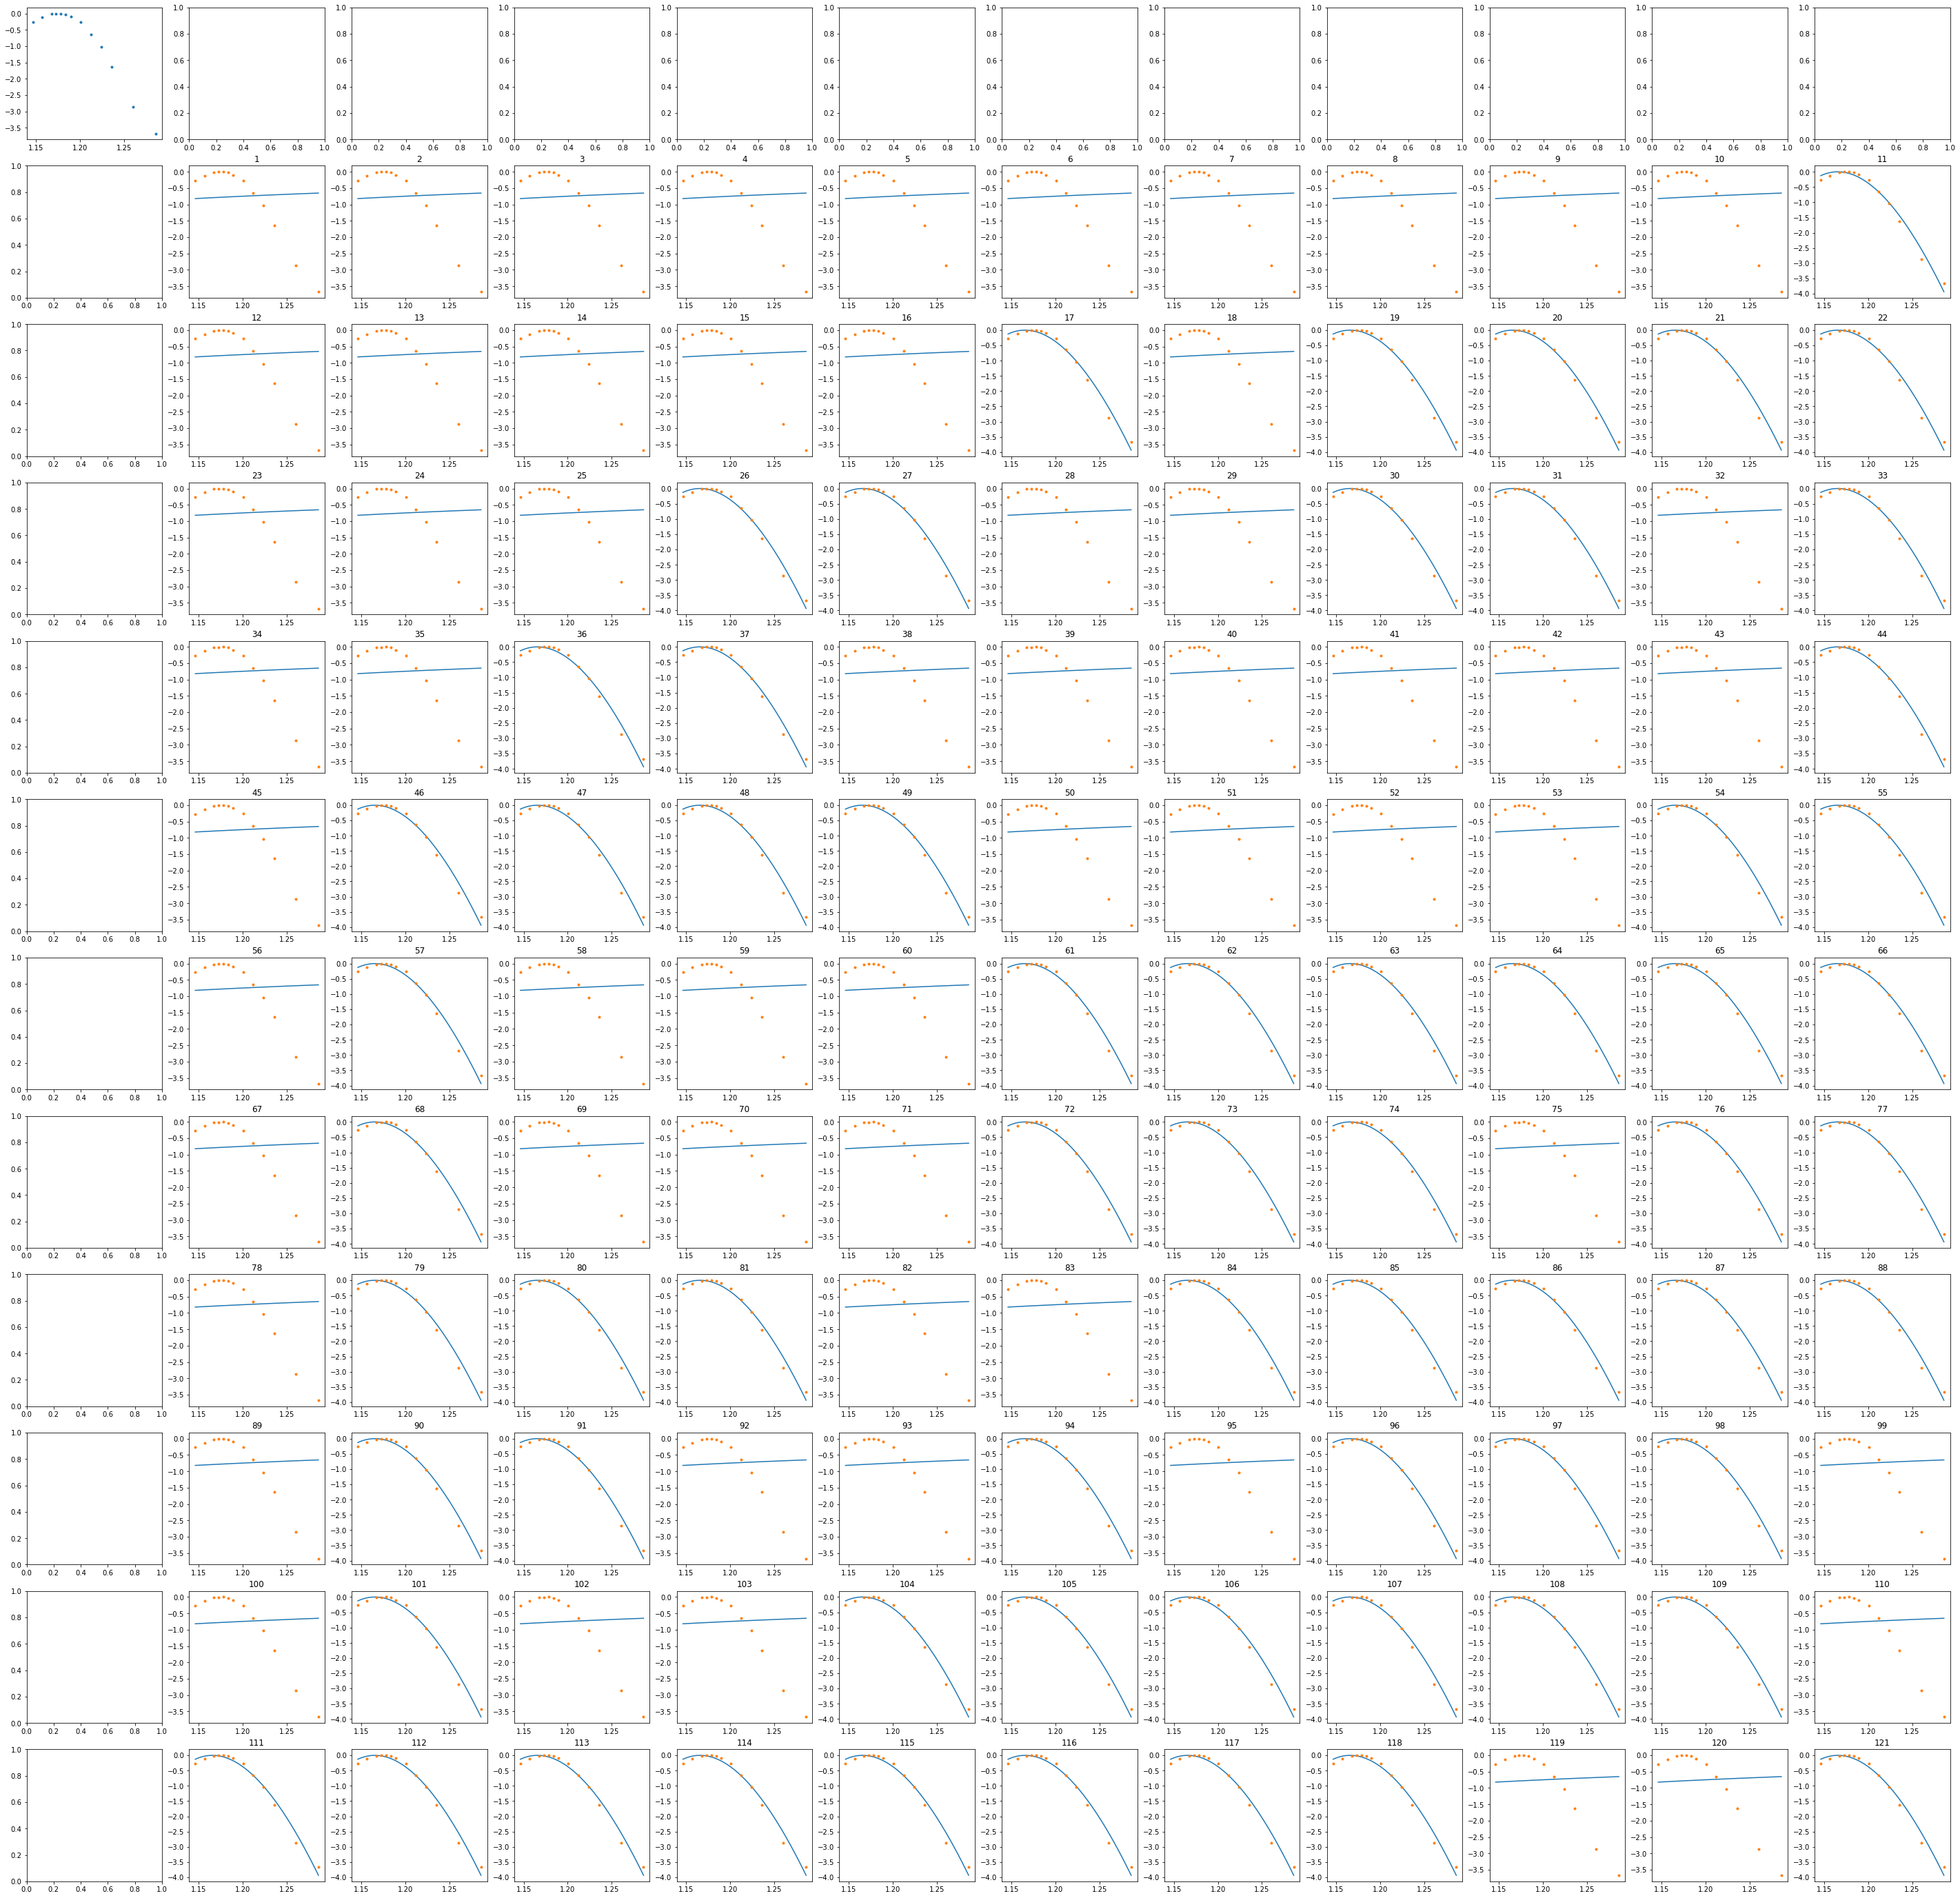

In [10]:
data=pd.read_table("Data/Rechts.txt",skiprows=2)
wavelen=np.array(data.values[:,0])
intens=np.array(data.values[:,1])
wavelen=adjustLambda(wavelen)
temp=np.argmax(intens)+5
xmin=28
intens=intens[xmin:temp]
intens=intens/np.max(intens)

#hier bin ich mir nicht sicher
intens=np.log(intens)

wavelen=wavelen[xmin:temp]
energy=wavelen_in_Energy(wavelen)
fig,ax=plt.subplots()
ax.plot(energy,intens,".")
fig,ax=plt.subplots(nrows=12,ncols=12,figsize=(50,50))
ax[0,0].plot(energy,intens,".")
Eg=np.linspace(1e-2,1e2,11)
Ef=Eg
counter=0
xcounter=0
ycounter=0
xaxis=np.linspace(min(energy),max(energy))
for x in Eg:
    xcounter=xcounter+1
    ycounter=0
    for y in Ef:
        try:
            counter=counter+1
            popt,pcov=curce_fit(indFit,energy,intens,p0=(x,y,1),maxfev=10000,bounds=([0,0,-np.inf],[np.inf,np.inf,np.inf]) )
            #if(popt[0]>popt[1]):
            print(counter,":",popt)
            ycounter=ycounter+1
            ax[xcounter,ycounter].plot(xaxis,indFit(xaxis,*popt))
            ax[xcounter,ycounter].plot(energy,intens,".")
            ax[xcounter,ycounter].set_title(counter)
        except RuntimeError:
            print("nothing")

In [11]:
def indFit(wl,Eg,Ep,A,T=77):
    wl=wl*1e-9
    h_nu= c.h*c.c /wl /c.e
    return A *((h_nu - Eg + Ep)**2/ ( np.exp(Ep/c.Boltzmann/c.e / T) -1) + (h_nu - Eg - Ep)**2/ ( 1- np.exp(-Ep/c.Boltzmann/c.e / T) ))

C:\Users\Gunther\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


1 : [  4.65564419e+02   4.66188587e+02   1.09418013e-04]
2 : [  4.75707734e+02   4.56045289e+02   1.09418057e-04]
3 : [  4.74328754e+02   4.57424278e+02   1.09418079e-04]
4 : [  4.23296226e+02   5.08456841e+02   1.09418166e-04]
5 : [  4.23438534e+02   5.08314484e+02   1.09418045e-04]
6 : [  4.42088095e+02   4.89664961e+02   1.09418138e-04]
7 : [  4.23224574e+02   5.08528403e+02   1.09417941e-04]
8 : [  4.02864465e+02   5.28888553e+02   1.09418045e-04]
9 : [  4.33330962e+02   4.98422070e+02   1.09418078e-04]
10 : [  4.04542223e+02   5.27210785e+02   1.09418019e-04]
11 : [  4.57161112e+02   4.74591912e+02   1.09418057e-04]
12 : [  4.90496216e+02   4.41256811e+02   1.09418068e-04]
13 : [  4.74964128e+02   4.56788860e+02   1.09417968e-04]
14 : [  4.36676645e+02   4.95076418e+02   1.09418157e-04]
15 : [  4.85828889e+02   4.45924154e+02   1.09418108e-04]
16 : [  4.89269213e+02   4.42483858e+02   1.09418175e-04]
17 : [  4.55600532e+02   4.76152455e+02   1.09417967e-04]
18 : [  4.28054123e+02 

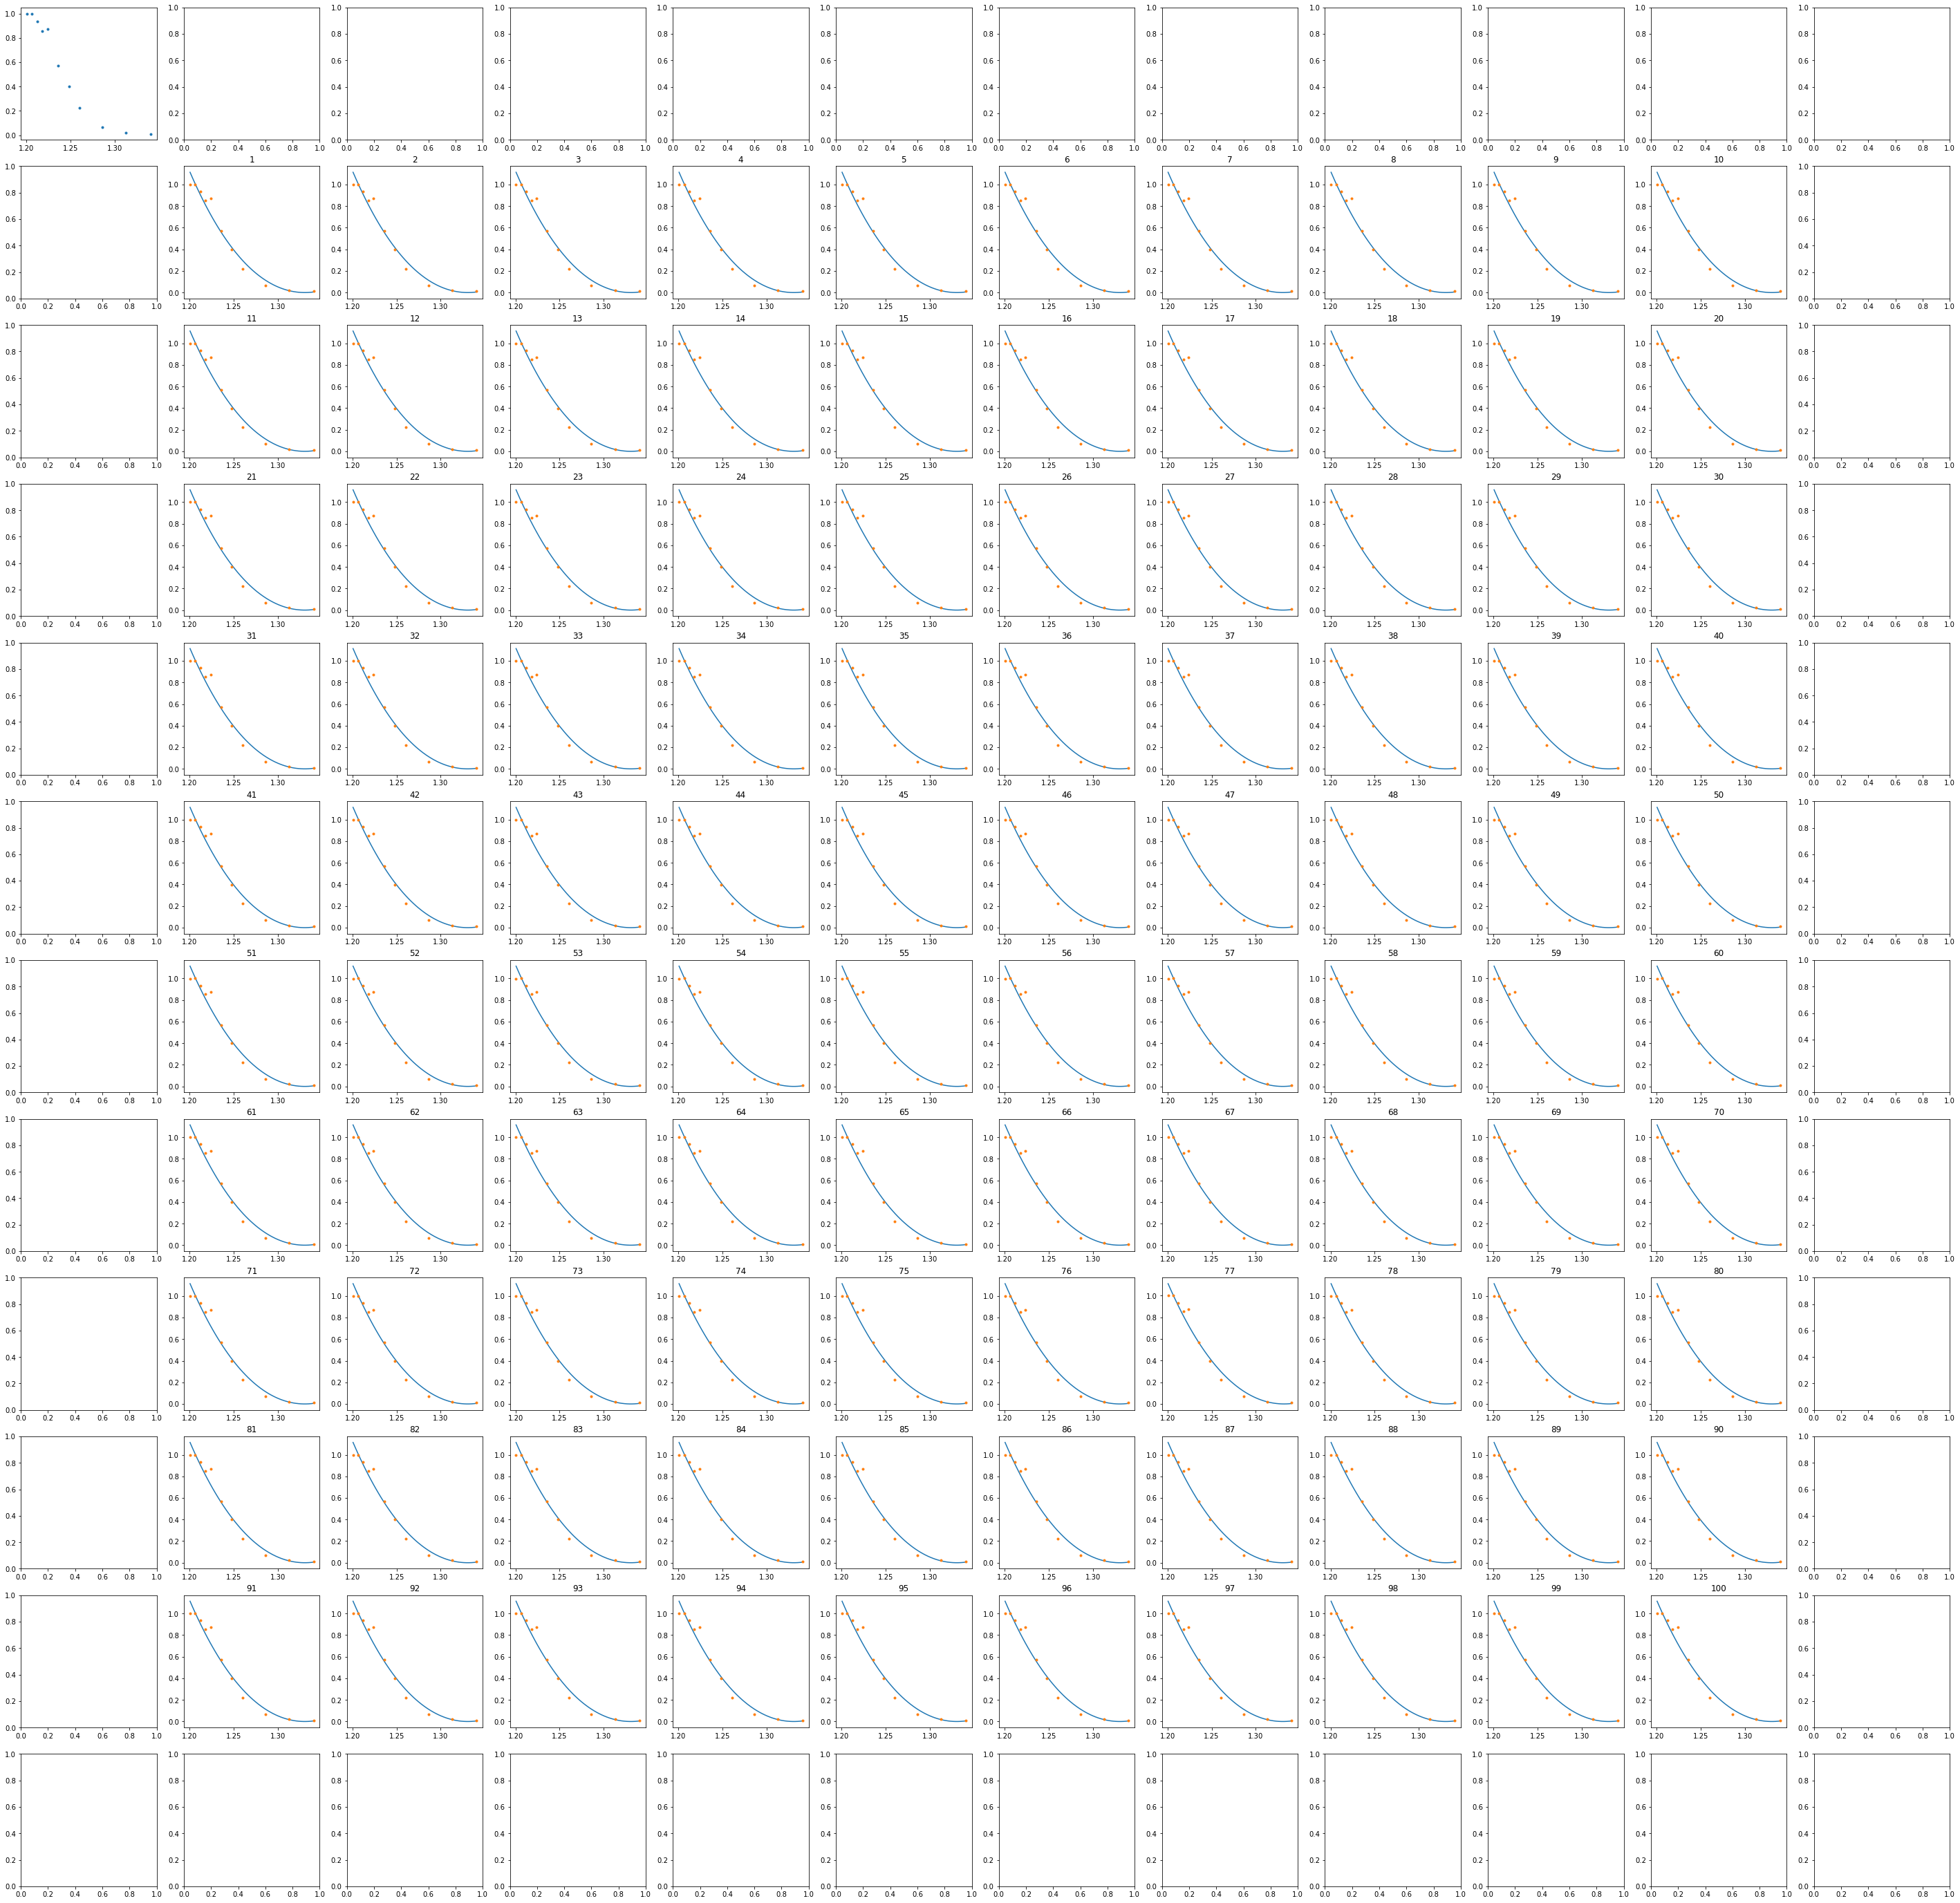

In [12]:
data=pd.read_table("Data/RechtsN2.txt",skiprows=2)
wavelen=np.array(data.values[:,0])
intens=np.array(data.values[:,1])
wavelen=adjustLambda(wavelen)
temp=np.argmax(intens)
xmin=26
intens=intens[xmin:temp]
intens=intens/np.max(intens)
#intens=np.log(intens)
wavelen=wavelen[xmin:temp]
energy=wavelen_in_Energy(wavelen)
fig,ax=plt.subplots(nrows=12,ncols=12,figsize=(50,50))
ax[0,0].plot(energy,intens,".")
Eg=np.linspace(1e-2,1e2,10)
Ef=Eg
counter=0
xcounter=0
ycounter=0
xaxis=np.linspace(min(energy),max(energy))
for x in Eg:
    xcounter=xcounter+1
    ycounter=0
    for y in Ef:
        try:
            
            popt,pcov=curce_fit(indFit,energy,intens,p0=(x,y,1),maxfev=10000,bounds=([0,0,-np.inf],[np.inf,np.inf,np.inf]))
            counter=counter+1
            print(counter,":",popt)
            ycounter=ycounter+1
            ax[xcounter,ycounter].plot(xaxis,indFit(xaxis,*popt))
            ax[xcounter,ycounter].plot(energy,intens,".")
            ax[xcounter,ycounter].set_title(counter)
        except RuntimeError:
            print("nothing")

In [13]:
c.Boltzmann/c.e

8.617330337217213e-05